# *Inj Q Tor" Prediction Model*

I opted for a 6 layer Artificial Neural Network for this model.<br>
*Why a Neural Network?* <br>
-Regression Prediction models arent that efficient as compared to these ANNs.<br>
-Efficiency can be tweaked and can be increased with these type of Neural Networks as shown in this model.


After tweaking with a few types of Neural Networks, I found out that a 6 layer, 21 Neurons Network output is the most efficient with about 96% - 97% efficiency.

All Observations:<br>
1st Observation: 3 layer, 9 Neurons model - 91% efficiency.<br>
2nd Observation: 4 layer, 13 Neurons model - 93% efficiency.<br>
3rd Observation: 5 layer, 17 Neurons model - 95% efficiency.<br>
4th Observation: 6 layer, 21 Neurons Model - 96-97% efficiency. (Selected this model)<br>
5th Observation: 7 layer, 25 Neurons Model - 93-95% efficiency with increased losses.<br>

#################################################################################




**Libraries Used: Pandas, Numpy, Seaborn, scikit-learn, Tensorflow 2, Keras**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset**

In [ ]:
df = pd.read_csv('T_000355_decimal.xlsx - Sheet1.csv')

In [ ]:
df.head()

,Unnamed: 0,Time,Latitude,Longitude,Altitude,RPM,Driver Demand Torque (%),Engine Load (%),Engine Torque Mode,TPS (%),Percent Load Curret Speed,Fuel Rate (L-Hr),Vehicle Speed,Inj Q Cur (mg-st),Inj Q Tor (mg-st),Boost Pressure (mBar),Atmospheric Pressure (mBar),Coolant Temperature (*C),Oil Temperature (*C),Boost Temperature (*C),Oil Pressure (mBar),Battery Voltage (V),Cam Speed (rpm),Rail Pressure (mBar),Rail Pressure set (mBar),MU PWM (%),MU Vol (mm3-s),Torque Rat,Torque (Nm),TQ Limit Set,Main Injection (mg-st),Pilot Injection (mg-st),Pos 2 Injector (mg-st),EGR Prop (%),EGR Pos D (%),EGR Pos A (%),Clutch Switch,Brake Switch,Engine Grad (rpm),param1,param2
0,0,2021-05-04 20:17:50,18.947098,73.941240,759.2,1033.0,57,57,-44,44.4,72,9.85,42.08,44.42,44.52,1177,924,87.3,90.1,40.4,3994,27.52,1032.0,905400,906200,17.53,13190,59.72,438.6,17.0,42.60,2,0,645.59,630.78,649.1,1,0,25.5,000000ff,07ffffff
1,1,2021-05-04 20:17:51,18.946997,73.941258,759.2,1037.0,57,57,-44,44.8,72,9.85,42.56,44.36,44.38,1181,924,87.3,90.1,40.3,4136,27.74,1035.5,909800,908700,17.48,13070,59.29,438.2,17.0,42.32,2,0,645.56,630.78,649.1,1,0,32586.5,000000ff,07ffffff
2,2,2021-05-04 20:17:52,18.946893,73.941277,759.2,1047.5,57,57,-92,44.0,71,9.85,42.71,43.82,44.12,1185,924,87.3,90.1,40.3,4035,27.72,1046.0,907600,908900,17.47,13130,58.37,435.8,17.0,41.92,2,0,645.58,630.78,649.1,1,0,32664.5,000000ff,07ffffff
3,3,2021-05-04 20:17:52,18.946893,73.941277,759.7,1041.5,51,51,-44,38.4,40,8.60,42.77,38.48,38.50,1188,924,87.3,90.1,40.3,4021,27.58,1044.5,905400,890400,18.04,11780,52.21,389.3,17.0,36.30,2,0,645.58,630.78,649.1,1,0,32586.0,000001ff,07ffffff
4,4,2021-05-04 20:17:54,18.946685,73.941312,759.7,1050.5,30,30,-108,29.2,48,4.75,42.34,21.28,22.00,1122,924,87.3,90.1,40.2,4169,27.58,1044.5,722800,735000,19.19,8710,34.60,238.2,17.0,20.20,2,0,645.57,630.78,649.1,1,0,32742.0,000000ff,07ffffff


**Splitting the data into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['RPM','TPS (%)']].values 

In [ ]:
y = df['Inj Q Tor (mg-st)'].values 

Using a split ratio of 80:20 for train and test resp.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape 

(454, 2)

**Scaling data from min and max values**

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train) 

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

**Deploying the Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

As mentioned above, using 6 layers, 21 Neurons for best efficiency. Activation used: **Rectified Linear Unit**

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu')) #layer 1
model.add(Dense(4, activation='relu')) #layer 2
model.add(Dense(4, activation='relu')) #layer 3
model.add(Dense(4, activation='relu')) #layer 4
model.add(Dense(4, activation='relu')) #layer 5

model.add(Dense(1)) #layer 6

model.compile(optimizer='rmsprop', loss='mse') 

Opted 250 train data read iterations for accuracy.

In [ ]:
model.fit(x=X_train,y=y_train,epochs=250) 

Epoch 1/250
15/15 [==============================] - 1s 2ms/step - loss: 967.4548
Epoch 2/250
15/15 [==============================] - 0s 2ms/step - loss: 964.1987
Epoch 3/250
15/15 [==============================] - 0s 2ms/step - loss: 963.1917
Epoch 4/250
15/15 [==============================] - 0s 2ms/step - loss: 962.2307
Epoch 5/250
15/15 [==============================] - 0s 2ms/step - loss: 961.1963
Epoch 6/250
15/15 [==============================] - 0s 2ms/step - loss: 960.1370
Epoch 7/250
15/15 [==============================] - 0s 2ms/step - loss: 959.0152
Epoch 8/250
15/15 [==============================] - 0s 1ms/step - loss: 957.8477
Epoch 9/250
15/15 [==============================] - 0s 2ms/step - loss: 956.6575
Epoch 10/250
15/15 [==============================] - 0s 2ms/step - loss: 955.3356
Epoch 11/250
15/15 [==============================] - 0s 1ms/step - loss: 953.9780
Epoch 12/250
15/15 [==============================] - 0s 1ms/step - loss: 952.5425
Epoch 13/250


**Losses Overview**

In [ ]:
loss_df = pd.DataFrame(model.history.history) 

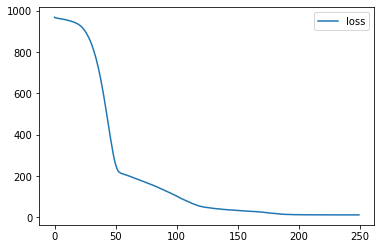

In [ ]:
loss_df.plot() 

It can be obseved from the plot that the losses go from very high value to a very low value which is perfect.

The following are the Metric losses for Test set and Train set resp.:

In [ ]:
model.evaluate(X_test, y_test,verbose=0) 

13.615407943725586

In [ ]:
model.evaluate(X_train, y_train,verbose=0) 

11.405230522155762

Test Predictions

---



In [ ]:
test_predictions = model.predict(X_test) 

In [ ]:
test_predictions = pd.Series(test_predictions.reshape(114,))

In [ ]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

Test Set Prediction Values:

In [ ]:
pred_df

,Test True Y
0,7.90
1,32.40
2,51.50
3,7.80
4,0.00
...,...
109,32.80
110,26.62
111,43.30
112,0.00


**Comapring Real values and Predicted Values.**

In [ ]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [ ]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
pred_df

,Test True Y,Model Predictions
0,7.90,6.057597
1,32.40,29.709862
2,51.50,54.515018
3,7.80,6.060305
4,0.00,4.435547
...,...,...
109,32.80,28.670647
110,26.62,37.269035
111,43.30,38.869114
112,0.00,4.435547


Plotting the results for better understanding.

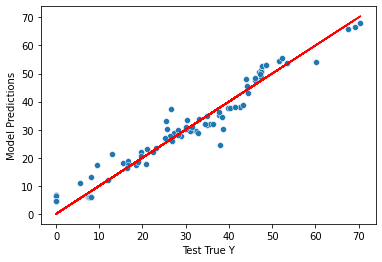

In [ ]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df) 
plt.plot(y_test,y_test,'r')

Ignoring the outliers, a very good prediction by the model can be observed from the plot.

The red line indicates the best prediction possible.
The scattered blue dots represent predictions by this model.

**Calculating Efficiency of the model.**

Calculating Mean Absolute error and Mean Squared Error.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions']) 

2.938792278557493

This means the model is approximately 4.10 off from the real value which is very low.

In [ ]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

3.6899062075120623

In [ ]:
df[['RPM','TPS (%)','Inj Q Tor (mg-st)']].describe()

,RPM,TPS (%),Inj Q Tor (mg-st)
count,568.000000,568.000000,568.000000
mean,846.755282,23.540845,24.777500
std,276.018403,19.057152,18.327832
min,0.000000,0.000000,0.000000
25%,600.500000,0.000000,7.880000
50%,975.500000,26.800000,23.970000
75%,1019.625000,36.800000,37.830000
max,1168.000000,64.400000,72.620000


In [ ]:
efficiency = ((72.62-2.93)/72.62)*100
print('Model efficiency:',efficiency)

Model efficiency: 95.96529881575323


#########################

**Predicting single Inj Q Tor. values from given RPM & TPS(%)**

In [ ]:
rpm = 1300
TPS = 48

New_Input = [[rpm,TPS]]

In [ ]:
New_Input = scaler.transform(New_Input)

In [ ]:
model.predict(New_Input) 

array([[37.794994]], dtype=float32)

**This means for a RMS of 1000 and TPS(%) of 38, the Inj Q Tor. is 37.794**

###################################